The efficiency frontier is a set of optimal portfolios that offer the highest expected returns for a given volatility - ie risk. Hence, any portfolio that does not lie in the frontier, is suboptimal. This is because these portfolios could provide higher returns for the same amount of risk.



In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
assets = ['MSFT','UNH']

pf_data = pd.DataFrame()
for t in assets:
    pf_data[t] = wb.DataReader(t, data_source='yahoo', start='2015-1-1')['Adj Close']

<AxesSubplot:xlabel='Date'>

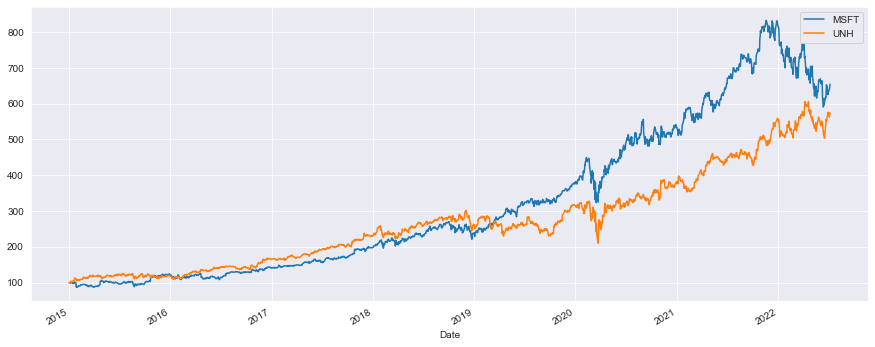

In [4]:
(pf_data / pf_data.iloc[0]*100).plot(figsize=(15,6))

In [5]:
log_returns = np.log(pf_data / pf_data.shift(1))
log_returns.mean()*250

MSFT    0.248490
UNH     0.230876
dtype: float64

In [6]:
log_returns.cov()*250

,MSFT,UNH
MSFT,0.075462,0.037777
UNH,0.037777,0.071453


In [7]:
log_returns.corr()

,MSFT,UNH
MSFT,1.000000,0.514463
UNH,0.514463,1.000000


In [8]:
num_assets = len(assets)
num_assets

2

In [9]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.78086394, 0.21913606])

Expected Portfolio Return

In [10]:
np.sum(weights * log_returns.mean())*252

0.2465869255801847

Expected Portfolio Variance

In [11]:
np.dot(weights.T, np.dot(log_returns.cov() *252, weights))

0.06287141777389624

In [12]:
print(f"Expected Portfolio Return: {round(np.sum(weights * log_returns.mean())*252*100,2)}%")
print(f"Expected Portfolio Variance: {round(100*np.dot(weights.T, np.dot(log_returns.cov() *252, weights)),2)}%")
print(f"Expected Portfolio Volatility: {round(100*np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights))),2)}%")

Expected Portfolio Return: 24.66%
Expected Portfolio Variance: 6.29%
Expected Portfolio Volatility: 25.07%


Expected Portfolio Volatility

In [13]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights)))

0.25074173520556214

In [14]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    pfolio_returns.append(np.sum(weights*log_returns.mean())*252)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

In [15]:
portfolios = pd.DataFrame({'Return':pfolio_returns,'Volatility':pfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.245535,0.244972
1,0.246650,0.250062
2,0.237965,0.240391
3,0.238091,0.240028
4,0.243412,0.238263


Text(0, 0.5, 'Expected Return')

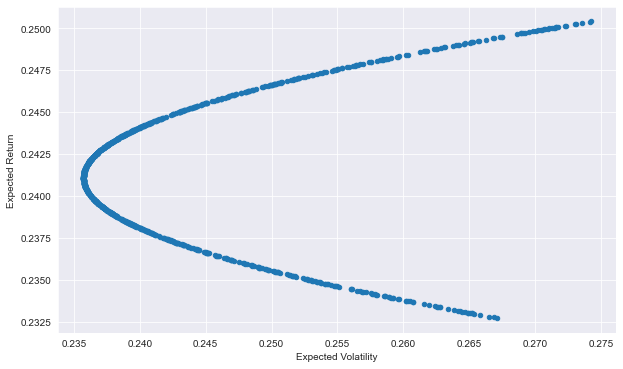

In [16]:
portfolios.plot(x='Volatility',y='Return', kind='scatter', figsize=(10,6))
#plt.axis([0,])
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')